In [3]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt   # 导入模块 matplotlib.pyplot，并简写成 plt 
import networkx as nx 
name=pd.read_csv(r"influence_data.csv",header=0)
data=pd.read_csv(r"2.csv",header=0)
name

,influencer_id,influencer_name,influencer_main_genre,influencer_active_start,follower_id,follower_name,follower_main_genre,follower_active_start
0,759491,The Exploited,Pop/Rock,1980,74,Special Duties,Pop/Rock,1980
1,25462,Tricky,Electronic,1990,335,PJ Harvey,Pop/Rock,1990
2,66915,Bob Dylan,Pop/Rock,1960,335,PJ Harvey,Pop/Rock,1990
3,71209,Leonard Cohen,Pop/Rock,1950,335,PJ Harvey,Pop/Rock,1990
4,91438,The Gun Club,Pop/Rock,1980,335,PJ Harvey,Pop/Rock,1990
...,...,...,...,...,...,...,...,...
42765,580300,Sufjan Stevens,Pop/Rock,1990,3661738,Rosemary & Garlic,Pop/Rock,2010
42766,261309,Vybz Kartel,Reggae,2000,3670556,Trinidad Cardona,R&B;,2010
42767,467203,Michael Jackson,R&B;,1960,3670556,Trinidad Cardona,R&B;,2010
42768,2518003,Popcaan,Reggae,2000,3670556,Trinidad Cardona,R&B;,2010


In [23]:
newFrame=data.T

,FAC1_1,FAC2_1,FAC3_1,FAC4_1,FAC5_1
792507,-1.487319,-0.401580,0.317241,-0.151347,-0.060162
119107,-3.535023,-0.979297,-0.053387,0.902715,-0.743883
816890,-0.565535,0.939858,0.957318,-0.164225,1.349655
79016,-1.566097,0.773227,0.738096,0.184280,0.046371
66915,-0.425568,-0.046578,0.786824,0.319392,0.595901
...,...,...,...,...,...
3359519,0.835878,1.742900,-1.148899,-0.859284,-2.050600
3381566,1.311992,0.502760,1.138611,-2.088778,-0.036907
3410250,0.652541,0.202334,-0.152251,-1.973300,-2.395218
3455945,0.901760,-0.819411,-1.081862,-0.439736,1.367255


In [6]:
def cos_sim(vector_a, vector_b):
    """
    计算两个向量之间的余弦相似度
    :param vector_a: 向量 a 
    :param vector_b: 向量 b
    :return: sim
    """
    vector_a = np.mat(vector_a)
    vector_b = np.mat(vector_b)
    num = float(vector_a * vector_b.T)
    denom = np.linalg.norm(vector_a) * np.linalg.norm(vector_b)
    cos = num / denom
    sim = 0.5 + 0.5 * cos
    return sim

In [25]:
inf=name['influencer_id'].tolist()
fow=name['follower_id'].tolist()
ans=[]
for i in range(0,40000):
    id1=inf[i]
    id2=fow[i]
    if id2 in inf: 
        x1=newFrame[id1].tolist()
        x2=newFrame[id2].tolist()
        t=cos_sim(x1,x2)
        ans.append(t)


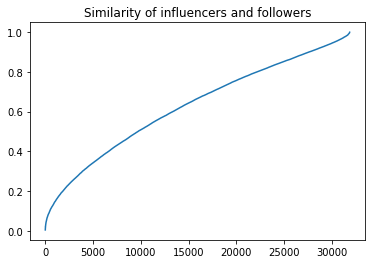

In [65]:
x=list(range(0,len(ans)))
ans.sort()
plt.title('Similarity of influencers and followers')
plt.plot(x,ans)

In [31]:
a=np.array(ans)
c=np.sum(a>=0.6)
d=np.sum(a>=0.4)
d=d-c
e=np.sum(a<0.4)

In [34]:
print(c)
print(d)
print(e)

18499
6727
6624


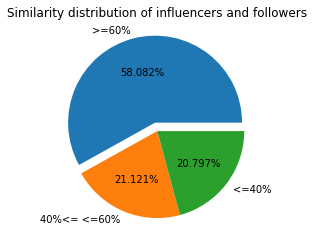

In [64]:
data=[18499,6727,6624]
labels=['>=60%','40%<= <=60%','<=40%']
explode=[0.1,0,0]
plt.pie(x=data,labels=labels,explode=explode,autopct='%.3f%%')
plt.title('Similarity distribution of influencers and followers')
plt.show()


In [72]:
df=pd.read_csv(r"genreCharctis.csv",header=0)

populardf=df['popularity']
df.drop(['popularity','count','artist_id'],axis=1,inplace=True)

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
x, y = df.iloc[:, 1:].values, np.array(populardf)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
feat_labels = df.columns[1:]
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(x_train, y_train.astype('int'))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [96]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) liveness                       0.100779
 2) mode                           0.092052
 3) duration_ms                    0.090545
 4) energy                         0.090522
 5) acousticness                   0.087227
 6) danceability                   0.087022
 7) loudness                       0.085758
 8) instrumentalness               0.083462
 9) valence                        0.078420
10) key                            0.069530
11) speechiness                    0.069320
12) tempo                          0.065363


In [78]:
df

,genre,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,duration_ms
0,Avant-Garde,0.404566,0.261854,0.341217,103.340268,-21.757794,0.777778,5.666667,0.720354,0.613785,0.126398,0.060002,401652.251611
1,Blues,0.575772,0.477170,0.653710,121.377634,-11.753796,0.829545,5.409091,0.530537,0.089117,0.193678,0.064174,233463.663397
2,Children's,0.656753,0.395091,0.636239,114.170183,-11.412667,1.000000,4.250000,0.652342,0.003774,0.248331,0.088887,147479.478070
3,Classical,0.335126,0.239361,0.215019,106.344177,-18.881773,0.812500,5.375000,0.857324,0.511564,0.164788,0.050032,321434.739475
4,Comedy/Spoken,0.541775,0.649806,0.465641,108.867125,-12.054004,0.864865,4.810811,0.647156,0.038947,0.571746,0.542696,268369.293022
5,Country,0.576463,0.533813,0.607576,122.723129,-9.912616,0.986772,5.843915,0.428162,0.037938,0.184246,0.046204,201577.227738
6,Easy Listening,0.468423,0.366991,0.396463,114.185966,-14.002016,0.875000,4.750000,0.680632,0.497367,0.184962,0.056223,201205.365669
7,Electronic,0.628703,0.674296,0.478752,120.693782,-9.036830,0.642857,6.142857,0.194625,0.358170,0.191563,0.079660,289515.364034
8,Folk,0.514971,0.319008,0.491430,121.173364,-13.991918,0.936709,5.405063,0.712536,0.083170,0.195173,0.064185,218918.878367
9,International,0.562671,0.477110,0.608368,117.253866,-12.016900,0.812500,5.312500,0.585974,0.112874,0.169419,0.072896,275186.154087


array([54, 53, 55, ..., 31, 43, 43], dtype=int64)

In [102]:
df=pd.read_csv(r"full_music_data.csv",header=0)

populardf=df['popularity']
df.drop(['popularity','year','artists_id','artist_names','release_date','song_title (censored)'],axis=1,inplace=True)

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
x, y = df.iloc[:, 1:].values, np.array(populardf)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
feat_labels = df.columns[1:]
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(x_train, y_train.astype('int'))

MemoryError: could not allocate 99614720 bytes